# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [13]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [4]:
fraud_df = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud_df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

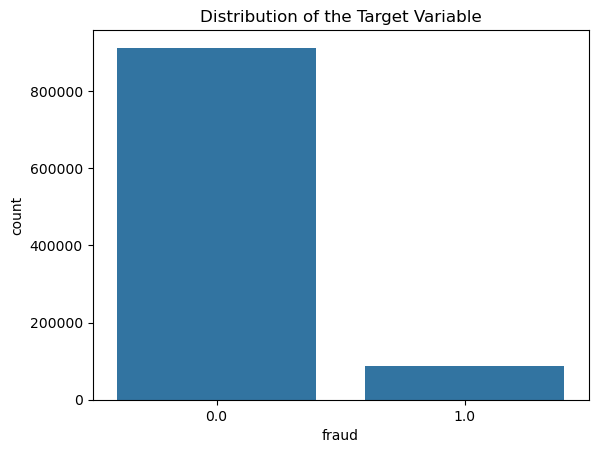

fraud
0.0    0.912597
1.0    0.087403
Name: proportion, dtype: float64

In [6]:
# Check the distribution of the target variable
sns.countplot(x='fraud', data=fraud_df)
plt.title('Distribution of the Target Variable')
plt.show()

# Calculate the class distribution
fraud_df['fraud'].value_counts(normalize=True)


In [ ]:
# Features and target variable
X = fraud_df.drop(columns=['fraud'])
y = fraud_df['fraud']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize and train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


c:\Users\ivann\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    273779
         1.0       0.90      0.57      0.70     26221

    accuracy                           0.96    300000
   macro avg       0.93      0.78      0.84    300000
weighted avg       0.95      0.96      0.95    300000



In [10]:
# Apply RandomOverSampler to balance the dataset
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Train the Logistic Regression model on the resampled data
model_oversampled = LogisticRegression(random_state=42)
model_oversampled.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_oversampled = model_oversampled.predict(X_test)

# Evaluate the model with the oversampled data
print(classification_report(y_test, y_pred_oversampled))


c:\Users\ivann\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    273779
         1.0       0.58      0.95      0.72     26221

    accuracy                           0.94    300000
   macro avg       0.79      0.94      0.84    300000
weighted avg       0.96      0.94      0.94    300000



In [12]:
# Apply RandomUnderSampler to balance the dataset
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# Train the Logistic Regression model on the undersampled data
model_undersampled = LogisticRegression(random_state=42)
model_undersampled.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_undersampled = model_undersampled.predict(X_test)

# Evaluate the model with the undersampled data
print(classification_report(y_test, y_pred_undersampled))


c:\Users\ivann\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    273779
         1.0       0.57      0.95      0.71     26221

    accuracy                           0.93    300000
   macro avg       0.78      0.94      0.84    300000
weighted avg       0.96      0.93      0.94    300000



In [14]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train the Logistic Regression model on the SMOTE data
model_smote = LogisticRegression(random_state=42)
model_smote.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_smote = model_smote.predict(X_test)

# Evaluate the model with SMOTE data
print(classification_report(y_test, y_pred_smote))


c:\Users\ivann\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96    273779
         1.0       0.56      0.95      0.71     26221

    accuracy                           0.93    300000
   macro avg       0.78      0.94      0.83    300000
weighted avg       0.96      0.93      0.94    300000

